# Stock market clustering

_Data Structures and Algorithms_

_Imperial College Business School_


---
This assignment is divided into three parts. In the first part, you will work on `pandas` data analysis. In the second part, you will implement a clustering algorithm to group companies based on their stock price movements. In the final part, you will explore ways to extend and improve this analysis. 

---
- **Assessment criteria**
  - Graded on **both correctness and presentation**.
  - Make results easy to read: apply **string formatting**, include **plots** when useful, and **comment your code**.

- **Testing**
  - There are **no OK tests** for this assignment.
  - You are expected to **explore the data and problem**, and use a **search engine** to identify appropriate pandas functions.
  - See `veryUseful.py` for a short list of potentially helpful pandas functions.

- **Collaboration**
  - This is **group work**; consider dividing tasks.
  - Some team members can focus on the **pandas/data analysis** component, others on the **algorithmic** component.
  - **Intermediate results** are provided to **test your algorithm**; you can begin both parts immediately (see **Question 3** for details).

- **Use of generative AI**
  - **Permitted only in Part 3** of the assignment.
  - If used (or if other external sources are used) in Part 3, **clearly document how** you used them.
  - **Not allowed** in the other parts.
---


## Your group

You'll complete this assignment in your assigned study groups. If you are unsure about your group, please contact the programme team.

## Submission
Submit your work via GitHub, following the detailed instructions provided in the assessment submission guidelines.


## Part 1: Pandas

**30% of grade**

In the previous homework, we used lists to study stock prices. The `pandas` library provides some more effective tools for data analysis.

The assignment comes with two files containing company data:
- `SP_500_firms.csv` with firm and ticker names
- `SP_500_close_2015.csv` with stock price data for 2015

Let's first load up this data.

In [1]:
# Load data into Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

def read_names_into_dict():
    """
    Read company names into a dictionary
    """
    d = dict()
    with open("SP_500_firms.csv") as csvfile:
        input_file = csv.DictReader(csvfile)
        for row in input_file:
            #print(row)
            d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

names_dict = read_names_into_dict()
comp_names = names_dict.keys()

# Read price data with pandas
filename = 'SP_500_close_2015.csv'
price_data = pd.read_csv(filename, index_col=0)

### Question 1: Returns

In the previous homework, we calculated stock price _returns_ over a period of time. The return is defined as the percentage change, so the return between periods $t-1$ and $t$ for stock price $p$ would be

$$
x_t = \frac{p_t - p_{t-1}}{p_{t-1}}.
$$

Calculate the returns in `pandas` for all the stocks in `price_data`.

In [2]:
# Calculate company returns
data_unstack = pd.DataFrame(price_data.unstack()).reset_index().rename(columns={'level_0':'Stock',0:'Price'})
data_unstack['Date'] = pd.to_datetime(data_unstack['Date'])
data_unstack = data_unstack.sort_values(by=['Stock', 'Date'])
data_unstack['Return'] = data_unstack.groupby('Stock')['Price'].transform(lambda x: x / x.shift(1) - 1)

### Question 1.1: Highest and lowest daily returns

Use pandas to find the 10 highest daily returns amongst all companies. Search online for what were the reasons behind the highest returns. Present your results in a clean and immediately readable form.

Repeat with the lowest daily returns.

In [3]:
# Find the 10 highest and lowest daily returns
Top_10_highest_return = data_unstack.sort_values(by='Return', ascending=False).head(10)
Top_10_lowest_return = data_unstack.sort_values(by='Return', ascending=True).head(10)

In [4]:
# Display the 10 highest dialy returns 
Top_10_highest_return

,Stock,Date,Price,Return
49556,FCX,2015-08-27,10.150626,0.286616
121581,WMB,2015-06-22,54.483408,0.258999
111329,TRIP,2015-10-14,83.720001,0.255361
53946,HAR,2015-01-29,121.878258,0.237600
92698,QRVO,2015-11-06,55.549999,0.232254
122409,WYNN,2015-10-02,62.041515,0.228389
111160,TRIP,2015-02-12,82.400002,0.224915
57809,HUM,2015-05-29,212.955142,0.203128
64714,KLAC,2015-10-21,62.030356,0.187895
86753,PRGO,2015-04-08,193.748480,0.183899


In [5]:
# Display the 10 lowest daily returns 
Top_10_lowest_return

,Stock,Date,Price,Return
93187,PWR,2015-10-16,18.740000,-0.285006
74439,KORS,2015-05-27,45.930000,-0.241954
17528,BIIB,2015-07-24,300.029999,-0.220802
103776,SRCL,2015-10-23,120.309998,-0.192767
124176,YUM,2015-10-07,66.091086,-0.188324
88978,RL,2015-02-04,135.946571,-0.182169
74965,MU,2015-06-26,19.660000,-0.181515
82637,NRG,2015-12-04,8.831297,-0.179581
70523,MNK,2015-11-09,58.009998,-0.169981
3735,AKAM,2015-10-28,62.910000,-0.167306


### Question 1.2: Highest and lowest yearly returns

Find the 10 highest yearly returns amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest yearly returns.

In [6]:
# Calculate yearly return for each stock: (last price of year - first price of year) / first price of year
yearly_prices = data_unstack.set_index('Date').groupby('Stock').resample('Y')['Price'].agg(['first', 'last'])
yearly_prices['Yearly_Return'] = (yearly_prices['last'] - yearly_prices['first']) / yearly_prices['first']

# Find the 10 highest and lowest yearly returns
Top_10_highest_yearly_return = yearly_prices.sort_values(by='Yearly_Return',ascending=False).head(10)
Top_10_lowest_yearly_return = yearly_prices.sort_values(by='Yearly_Return',ascending=True).head(10)

/tmp/ipykernel_633/3701401840.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_prices = data_unstack.set_index('Date').groupby('Stock').resample('Y')['Price'].agg(['first', 'last'])


In [7]:
# Display the 10 highest yearly returns
Top_10_highest_yearly_return

,,first,last,Yearly_Return
Stock,Date,,,
NFLX,2015-12-31,49.848572,114.379997,1.294549
AMZN,2015-12-31,308.519989,675.890015,1.190750
ATVI,2015-12-31,19.765196,38.397531,0.942684
AYI,2015-12-31,139.234407,233.418545,0.676443
NVDA,2015-12-31,19.642392,32.695044,0.664514
GPN,2015-12-31,40.276764,64.480414,0.600933
HRL,2015-12-31,25.076529,39.094699,0.559016
EXR,2015-12-31,55.660139,85.965350,0.544469
VRSN,2015-12-31,57.189999,87.360001,0.527540


In [8]:
# Display the 10 lowest yearly returns
Top_10_lowest_yearly_return

,,first,last,Yearly_Return
Stock,Date,,,
CHK,2015-12-31,19.546924,4.500000,-0.769785
SWN,2015-12-31,27.170000,7.110000,-0.738314
FCX,2015-12-31,22.855546,6.770000,-0.703792
KMI,2015-12-31,39.669553,14.597110,-0.632032
MU,2015-12-31,34.750000,14.160000,-0.592518
NRG,2015-12-31,26.202970,11.549374,-0.559234
RRC,2015-12-31,55.073725,24.570357,-0.553864
MRO,2015-12-31,27.352847,12.407730,-0.546383
MUR,2015-12-31,46.660241,21.531765,-0.538541


### Question 1.3: Highest and lowest volatilities

Find the 10 highest yearly volatilities (standard deviations) amongst all companies. Present your results in a clean and immediately readable form.

Repeat with the lowest volatilities.

In [9]:
# Calculate  yearly volatilities for each stock
yearly_volatilities = data_unstack.groupby('Stock').std().reset_index()[['Stock','Return']].rename(columns={'Return':'Volatilities'})

# Find the 10 highest and lowest volatilities
Top_10_highest_yearly_volatilities = yearly_volatilities.sort_values(by='Volatilities', ascending=False).head(10)
Top_10_lowest_yearly_volatilities = yearly_volatilities.sort_values(by='Volatilities', ascending=True).head(10)

In [10]:
# Display the 10 highest yearly volatilities
Top_10_highest_yearly_volatilities

,Stock,Volatilities
174,FCX,0.044071
88,CHK,0.042784
384,RIG,0.037553
417,SWN,0.035199
482,WYNN,0.034918
376,QRVO,0.033473
302,MNK,0.032573
477,WMB,0.032224
389,RRC,0.032172
321,NFLX,0.031975


In [11]:
# Display the 10 lowest yearly volatilities
Top_10_lowest_yearly_volatilities

,Stock,Volatilities
259,KO,0.009063
87,CHD,0.009599
24,AJG,0.009711
352,PEP,0.009713
93,CLX,0.009725
142,DVA,0.009882
422,T,0.009943
468,VZ,0.009949
390,RSG,0.009973
355,PG,0.010106


### Question 2: Correlations

Analysts often care about the _correlation_ of stock prices between firms. Correlation measures the statistical similarity between the two prices' movements. If the prices move very similarly, the correlation of their _returns_  is close to 1. If they tend to make exactly the opposite movements (ie one price moves up and the other one down), the correlation is close to -1. If there is no clear statistical relationship between the movements of two stock prices, the correlation in their returns is close to zero.

For a sample of stock price returns $x,y$ with observations for $n$ days, the correlation $r_{xy}$ between $x$ and $y$ can be calculated as:

$$
r_{xy} = \frac{\sum x_i y_i - n \bar{x}\bar{y}}{ns_x s_y} = {\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}.
$$

Here $\bar{x}$ refers to the average value of $x$ over the $n$ observations, and $s_x$ to its standard deviation.

Based on time series of the stock returns we just computed, we can calculate a  correlation value for each pair of stocks, for example between MSFT (Microsoft) and AAPL (Apple). This gives us a measure of the similarity between the two stocks in this time period.


Calculate all correlations between companies. You can search online for a `pandas` or `numpy` function that does this directly.

In [12]:
# Calculate the correlation matrix of stock returns
pivoted_returns = data_unstack.pivot(index='Date', columns='Stock', values='Return')
correlation_matrix = pivoted_returns.corr()

### Question 2.1

Next, analyse the correlations between the companies:
- Define functions to print out the $n$ top and bottom correlated companies for any given company. 
- Use your functions to study the following companies in the tech sector: Amazon, Microsoft, Facebook, Apple, and Google. Comment on the results. Which (possibly other) companies are they most closely related to in terms of highest correlations? Would you have expected the results you see?

In [13]:
# Define the function
def obtain_top_bottom(matrix, stock, top_n = 10):
    corr_for_stock = matrix[[stock]].reset_index()
    return corr_for_stock[corr_for_stock['Stock']!=stock].sort_values(stock, ascending=False).head(top_n), corr_for_stock[corr_for_stock['Stock']!=stock].sort_values(stock).head(top_n)

In [14]:
# Find the 10 top of bottom correlated companies for given company 
Top_10_highest_corr_AMZN, Top_10_lowest_corr_AMZN = obtain_top_bottom(correlation_matrix, 'AMZN')
Top_10_highest_corr_MSFT, Top_10_lowest_corr_MSFT = obtain_top_bottom(correlation_matrix, 'MSFT')
Top_10_highest_corr_FB, Top_10_lowest_corr_FB = obtain_top_bottom(correlation_matrix, 'FB')
Top_10_highest_corr_AAPL, Top_10_lowest_corr_AAPL = obtain_top_bottom(correlation_matrix, 'AAPL')
Top_10_highest_corr_GOOG, Top_10_lowest_corr_GOOG = obtain_top_bottom(correlation_matrix, 'GOOG')

In [15]:
# Display the 10 highest correlations with Amazon
Top_10_highest_corr_AMZN

Stock,Stock,AMZN
200,GOOGL,0.585553
199,GOOG,0.584337
392,SBUX,0.571951
457,V,0.560704
284,MA,0.538708
249,JNPR,0.531443
311,MSFT,0.524403
172,FB,0.500222
228,HSIC,0.479651
239,IPG,0.471228


The strong correlation between Amazon and Google can be largely attributed to their highly overlapping businesses, which often leads investors to treat them as the same type of asset allocation. In particular, in cloud computing, Amazon Web Services and Google Cloud Platform are direct competitors. By contrast, Apple and Microsoft are often regarded as hardware/software giants, while Facebook is seen as a social media company, making their investment logic less aligned with Amazon.

In [16]:
# Display the 10 highest correlations with Microsoft
Top_10_highest_corr_MSFT

Stock,Stock,MSFT
300,MMC,0.604549
355,PG,0.604204
284,MA,0.590886
12,ADP,0.589445
392,SBUX,0.583705
69,BRK-B,0.583071
74,CA,0.580201
8,ACN,0.577228
35,AMP,0.577016
179,FISV,0.576048


The high correlation between Microsoft and MMC is not due to them being in the same industry. One possible reason is that the trend of digital transformation has had a similar impact on both companies. MMC’s main clients are large enterprises that require insurance and risk management, and under the wave of digital transformation, modern risk management is increasingly dependent on technological solutions. Microsoft’s cloud and security products (Azure, Microsoft Security) align well with the needs of MMC’s clients.

In [17]:
# Display the 10 highest correlations with Facebook
Top_10_highest_corr_FB

Stock,Stock,FB
179,FISV,0.619667
284,MA,0.617659
392,SBUX,0.598190
200,GOOGL,0.586548
439,TSS,0.580214
199,GOOG,0.569256
457,V,0.559706
344,PAYX,0.559205
12,ADP,0.557133
221,HON,0.556113


Facebook does not directly engage in payments, but both payments and advertising rely on consumer spending and transaction activity. Therefore, its stock price shows a strong correlation with FISV and Mastercard. Specifically, FISV provides payment processing, financial services software, and electronic transaction solutions, while Mastercard is a global payment network giant. Together with Facebook, they form part of the digital consumption chain.

In [18]:
# Display the 10 highest correlations with Apple
Top_10_highest_corr_AAPL

Stock,Stock,AAPL
243,ITW,0.601265
326,NOC,0.589368
221,HON,0.576730
179,FISV,0.573935
416,SWKS,0.573350
105,COL,0.570694
426,TEL,0.569454
53,BA,0.563837
386,ROK,0.560731
473,WFC,0.558983


Apple and ITW share exposure to supply chain dynamics and cost structures. Apple’s hardware production relies heavily on a wide range of components and manufacturing processes, while ITW operates across industrial manufacturing segments. Both companies are influenced by fluctuations in raw material costs, such as metals and energy, and by global supply chain conditions. These elements can drive their stock prices to move in similar directions.

In [19]:
# Display the 10 highest correlations with Google
Top_10_highest_corr_GOOG

Stock,Stock,GOOG
200,GOOGL,0.989365
37,AMZN,0.584337
172,FB,0.569256
356,PGR,0.547913
311,MSFT,0.520563
284,MA,0.512357
392,SBUX,0.501990
221,HON,0.496112
228,HSIC,0.489696
179,FISV,0.487890


## Part 2:  Clustering

**30% of grade**

In this part of the assignment, you will develop a clustering algorithm to study the similarity of different stocks. 

The general purpose of clustering analysis is dividing a set of objects into groups that are somehow "similar" to each other. It is a widespread tool used for exploratory data analysis in diverse fields in both science and business. For example, in marketing analytics, cluster analysis is employed to group consumers into segments based on their characteristics or _features_, such as age, post code, purchase history, etc. These features are somehow aggregated to compare the similarity between consumers. Based on this similarity, a clustering algorithm then divides the consumers into segments.

We will apply this idea on stock market data to identify groups of stocks that perform similarly over time. There are many reasons for grouping stocks together, such as analysing trading strategies, risk management, or simply presenting stock market information. Publicly traded companies are often grouped together by simple features such as the industry they operate in (eg tech companies or pharma companies), but here we'll take a data-driven approach, grouping together stocks that perform similarly over time. 

Cluster analysis is an umbrella term for many different algorithmic approaches. Here you'll develop one that's based on the concept of `greedy` algorithm design, specified below. You'll also have the opportunity to explore other approaches using Python libraries.

What is a good measure for stocks "performing similarly" to use for clustering. Let's use the one we just calculated: correlations in their returns. How can we use this similarity information for clustering? We now have access to all correlations between stock returns in S&P 500. We can think of this as a _graph_ as follows. The _nodes_ of the graph are the stocks (eg MSFT and AAPL). The _edges_ between them are the correlations, which we have just calculated between each stock, where the value of the correlation is the edge weight. Notice that since we have the correlations between all companies, this is a _dense_ graph, where all possible edges exist.

We thus have a graph representing pairwise "similarity" scores in correlations, and we want to divide the graph into clusters. There are many possible ways to do this, but here we'll use a _greedy_ algorithm design. The algorithm is as follows:

1. Sort the edges in the graph by their weight (ie the correlation), pick a number $k$ for the number of iterations of the algorithm
2. Create single-node sets from each node in the graph
3. Repeat $k$ times:
	1. Pick the graph edge with the highest correlation
	2. Combine the two sets containing the source and the destination of the edge
	3. Repeat with the next-highest weight edge
4. Return the remaining sets after the $k$ iterations 

What does the algorithm do? It first initializes a graph with no connections, where each node is in a separate set. Then in the main loop, it runs through the $k$ highest-weighted edges, and adds connections at those edges. This leads to sets being combined (or "merged"). The result is "groups" of stocks determined by the highest correlations between the stock returns. These are your stock clusters.

For example, suppose that the toy graph below represents four stocks: A,B,C,D and their return correlations. Suppose we pick $k=2$ and run the algorithm. 

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


The algorithm would begin by initializing four separate sets of one node each: {A}, {B}, {C}, {D}. It would then first connect C and D because of their correlation 0.95, resulting in just three sets: {A}, {B}, and {C,D}. Then it would connect A and B, resulting in two sets of two nodes each: {A,B}, and {C,D}. These would be our clusters for $k=2$.

### Question 3: Implementing the algorithm

Your task is to implement the clustering algorithm using the functions below. First, for convenience in implementing the algorithm, let's create a list of the correlations from the pandas data. 

In [20]:
def create_correlation_list(correl):
    """
    Creates a list of correlations from a pandas dataframe of correlations
    
    Parameters:
        correl: pandas dataframe of correlations
    
    Returns:
        list of correlations containing tuples of form (correlation, ticker1, ticker2)
    """
    n_comp = len(correl.columns)
    comp_names = list(correl.columns)
    # Faster if we use a numpy matrix
    correl_mat = correl.to_numpy()
    L = [] # create list
    for i in range(n_comp):
        for j in range(i+1,n_comp):
            L.append((correl_mat[i,j],comp_names[i],comp_names[j]))
    return L

edges = create_correlation_list(correlation_matrix)

Next, let's turn to the algorithm itself. Consider the example above, repeated here.

<img src="cluster0.png" alt="cluster0" style="width: 200px;"/>


Suppose we pick $k=3$ and have sorted the edge list in step 1 of the algorithm. How should we represent the clusters in step 2? One great way is to use a dictionary where each _key_ is a node, and each _value_ is another node that this node "points to". A cluster is then a chain of these links, which we represent as a dictionary.

In step 2 of the algorithm, we start with four nodes that point to themselves, ie the dictionary `{'A':'A','B':'B','C':'C','D':'D'}`. When a node points to itself, it ends the chain. Here the clusters are thus just the nodes themselves, as in the figure below.

<img src="cluster1.png" alt="cluster1" style="width: 200px;"/>


Let's walk through the algorithm's next steps. We first look at the highest-weight edge, which is between C and D. These clusters will be combined. In terms of the dictionary, this means that one of them will not point to itself, but to the other one (here it does not matter which one). So we make the dictionary at `C` point to `D`. The dictionary becomes `{'A':'A','B':'B','C':'D','D':'D'}`.

<img src="cluster2.png" alt="cluster2" style="width: 200px;"/>


The next highest correlation is between A and B, so these clusters would be combined. The dictionary becomes `{'A':'B','B':'B','C':'D','D':'D'}`.

<img src="cluster3.png" alt="cluster3" style="width: 200px;"/>


The third highest correlation is between C and B. Let's think about combining these clusters using the dictionary we have. Looking up `B`, we get `B`: the node B is in the _bottom_ of the chain representing its cluster. But when we look up `C`, it points to `D`. Should we make `C` point to `B`? No - that would leave nothing  pointing at `D`, and `C` and `D` should remain connected! We could perhaps have `C` somehow point at both nodes, but that could become complicated, so we'll do the following instead. We'll follow the chain to the bottom. In the dictionary, we look up `C` and see that it points to `D`. We then look up `D` which points to itself, so `D` is the _bottom_ node. We then pick one of the bottom nodes `B` and `D`, and make it point to the other. We then have the dictionary `{'A':'B','B':'B','C':'D','D':'B'}`, and the corresponding clustering in the figure below.

<img src="cluster4.png" alt="cluster4" style="width: 200px;"/>


In other words, we'll keep track of clusters in a dictionary such that **each cluster has exactly one bottom node**. To do this, we need a mechanism for following a cluster to the bottom. You'll implement this in the function `find_bottom` below. The function takes as input a node and a dictionary, and runs through the "chain" in the dictionary until it finds a bottom node pointing to itself.

The other thing we'll need to do is combine clusters by connecting two nodes. This means taking the two nodes, finding the bottom node for each node's cluster, and making one point to the other. You'll implement this in the function `merge_clusters` below.

Finally, you'll need to set up the algorithm by sorting the correlations, and then looping through this merging $k$ times. You'll implement this in the function `cluster_correlations` below. This completes the algorithm.

But there is one more thing. If you only keep track of a dictionary like `{'A':'B','B':'B','C':'D','D':'B'}`, how do you actually find the clusters from the dictionary? A convenient way is to store some extra information: the "starting nodes" of each cluster to which no other node links. For example, above these "starting nodes" would include all nodes `A,B,C,D` in the beginning, but only `A` and `C` in the end. If we keep track of these, we can then write a function that starts from each such remaining "starting node", works through to the bottom, and creates the cluster along the way. You'll implement this in the function `construct_sets` below.

### Intermediary results

You can load a pre-computed set of results up to this point using the following commands.

In [21]:
# Load intermediary results from a "pickle" file
# You can use these with your algorithm below
import pickle
file_name = 'cluster_correlations'
with open(file_name, "rb") as f:
    correl = pickle.load(f)
    edges = pickle.load(f)

firms = list(correl.columns)
print(firms[:10])
edges[:10]

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET']


[(np.float64(0.598666164029738), 'MMM', 'ABT'),
 (np.float64(0.32263699601940254), 'MMM', 'ABBV'),
 (np.float64(0.6320593488560189), 'MMM', 'ACN'),
 (np.float64(0.41855006701119907), 'MMM', 'ATVI'),
 (np.float64(0.4508974957132859), 'MMM', 'AYI'),
 (np.float64(0.4687548443045165), 'MMM', 'ADBE'),
 (np.float64(0.25713165217544326), 'MMM', 'AAP'),
 (np.float64(0.33537796741224424), 'MMM', 'AES'),
 (np.float64(0.31737374099675925), 'MMM', 'AET'),
 (np.float64(0.5059306055816828), 'MMM', 'AMG')]

### Clustering implementation

Complete the following functions to implement the clustering algorithm.

In [22]:
def find_bottom(node, next_nodes):
    """
    Find the "bottom" of a cluster starting from node in dictionary next_nodes

    Parameters:
        node: starting node
        next_nodes: dictionary of node connections

    Returns:
        the bottom node in the cluster
    """
    current = node
    visited = set()
    while True:
        if current in visited:
            raise ValueError
        visited.add(current)
        nxt = next_nodes[current]
        if nxt == current:
            return current
        current = nxt
    
    pass


def merge_sets(node1, node2, next_nodes, set_starters):
    """
    Merges the clusters containing node1, node2 using the connections dictionary next_nodes.
    Also removes any bottom node which is no longer a "starting node" from set_starters.

    Parameters:
        node1: first node the set of which will be merged
        node2: second node the set of which will be merged
        next_nodes: dictionary of node connections
        set_starters: set of nodes that "start" a cluster

    Returns:
        does this function need to return something?
    """
    bottom1 = find_bottom(node1, next_nodes)
    bottom2 = find_bottom(node2, next_nodes)

    if bottom1 == bottom2:
        return

    next_nodes[bottom1] = bottom2
    set_starters.discard(bottom2)


def cluster_correlations(edge_list, firms, k=200):
    """
    A mystery clustering algorithm
     
    Parameters:
         edge_list - list of edges of the form (weight,source,destination)
         firms - list of firms (tickers)
         k - number of iterations of algorithm

    Returns:
         next_nodes - dictionary to store clusters as "pointers"
            - the dictionary keys are the nodes and the values are the node in the same cluster that the key node points to
         set_starters - set of nodes that no other node points to (this will be used to construct the sets below)

    Algorithm:
         1 sort edges by weight (highest correlation first)
         2 initialize next_nodes so that each node points to itself (single-node clusters)
         3 take highest correlation edge
            check if the source and destination are in the same cluster using find_bottom
            if not, merge the source and destination nodes' clusters using merge_sets
         4 if max iterations not reached, repeat 3 with next highest correlation
         (meanwhile also keep track of the "set starters" ie nodes that have nothing pointing to them for later use)
    """
    # Sort edges
    sorted_edges = sorted(
        (edge for edge in edge_list if not np.isnan(edge[0])),
        key=lambda x: x[0],
        reverse=True,
    )
    # Initialize dictionary of pointers
    next_nodes = {node: node for node in firms}
    # Keep track of "starting nodes", ie nodes that no other node points to in next_nodes
    set_starters = {node for node in firms}

    # Loop k times
    for i in range(k):
        # Your algorithm here
        weight, src, dst = sorted_edges[i]
        if find_bottom(src, next_nodes) != find_bottom(dst, next_nodes):
            merge_sets(src, dst, next_nodes, set_starters)
        
    return set_starters, next_nodes

In [23]:
set_starters, next_nodes = cluster_correlations(edges, firms, k=200)

Once we've run the algorithm, we'll need to construct the clusters. You can use the function below to do so.

In [24]:
def construct_sets(set_starters, next_nodes):
    """
    Constructs sets (clusters) from the next_nodes dictionary
    
    Parameters:
        set_starters: set of starting nodes 
        next_nodes: dictionary of connections
    
    Returns: 
        dictionary of sets (clusters):
            key - bottom node of set; value - set of all nodes in the cluster
    
    """
    # Initialise an empty dictionary 
    all_sets = dict()
    
    # Loop:
    # Start from each set starter node
    # Construct a "current set" with all nodes on the way to bottom node
    # If bottom node is already a key of all_sets, combine the "current set" with the one in all_sets,
    # Otherwise add "current set" to all_sets
    for s in set_starters:
        cur_set = set()
        cur_set.add(s)
        p = s
        while next_nodes[p] != p:
            p = next_nodes[p]
            cur_set.add(p)
            
        if p not in all_sets:
            all_sets[p] = cur_set
        else: 
            for item in cur_set:
                all_sets[p].add(item)
    return all_sets

all_clusters = construct_sets(set_starters,next_nodes)

### Question 3.2: analysing the results

After you have implemented the algorithm in Python, add cells below answering the following questions:
- Do some detective work: what is the algorithm that you've implemented called? In what other graph problem is it often used? How are the problems related? (Hint: the algorithm is mentioned on the Wikipedia page for greedy algorithms.)

- Run the algorithm and present the results formatted in a useful way. 

- Discuss the results for different values of $k$.  

- Do the resulting clusters "make sense"? (You may need to search online what the companies do.) 

#### Analysis 1: Algorithm Exploration

The implemented clustering algorithm follows a **"greedy principle"**, where at each step the pair of firms with the highest remaining correlation is selected and their clusters are merged. This iterative process continues for a predefined number of steps _k_, gradually forming larger and more connected groups.

Conceptually, the method corresponds to **Kruskal’s algorithm**, a classical greedy approach for constructing a maximum spanning forest in a weighted graph. In this context, the graph’s nodes represent companies, and the edge weights correspond to their pairwise correlations.

This algorithm is closely related to the **Maximum Spanning Tree** problem, which seeks to connect all nodes through the strongest possible links without creating cycles. In clustering, stopping the process early yields multiple disconnected trees, each representing a distinct cluster.

#### Analysis 2: Clustering Results

After applying the algorithm with a parameter setting of **_k=200_** for the year 2005, a total of **432 clusters** were obtained.

 First, A  brief **grouping list** containing each company’s name and sector classification is presented below to provide an overview of the clustering outcome. Given that only three firms appear in Cluster 3 and even fewer in subsequent groups, only the first three clusters are displayed in this section. The final network visualisation effectively highlights the correlation strength among companies within these major clusters.

To illustrate the operation of the clustering algorithm, a **network graph** and its **animated GIF** was first generated to visualise how correlations progressively link companies into clusters. For clarity, the stocks that finally form **Cluster 1** are used as an example rather than displaying the entire dataset. The visualisation clearly shows how highly correlated pairs are connected step by step until the final clusters emerge.

In [25]:
# Clustering Results when k=200
# 运行 k=200，展示基本结果
set_starters, next_nodes = cluster_correlations(edges, firms, k=200)
all_clusters_200 = construct_sets(set_starters, next_nodes)

print(f"Number of clusters when k=200: {len(all_clusters)}")

for i, (bottom, members) in enumerate(all_clusters.items()):
    print(f"\nCluster {i+1} ({len(members)} stocks):")
    print(", ".join(sorted(members)))
    if i >= 2:
        break

Number of clusters when k=200: 432

Cluster 1 (1 stocks):
HES

Cluster 2 (1 stocks):
WAT

Cluster 3 (1 stocks):
PEP


In [26]:
# Check if networkx is installed
try:
    import networkx as nx
    print("networkx is already installed")
except ImportError:
    print("Installing networkx...")
    import sys
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "networkx"])
    import networkx as nx
    print("networkx installed successfully")

networkx is already installed


In [27]:
# Create network graph visualization of clustering process

import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import networkx as nx
from IPython.display import HTML

def visualize_clustering_process(edge_list, firms, k=20, sample_size=12):
    # Select companies with highest correlations
    sorted_edges = sorted(
        (edge for edge in edge_list if not np.isnan(edge[0])),
        key=lambda x: x[0],
        reverse=True,
    )
    
    # Get top correlated companies
    selected_firms = set()
    for edge in sorted_edges[:k*2]:
        selected_firms.add(edge[1])
        selected_firms.add(edge[2])
        if len(selected_firms) >= sample_size:
            break
    
    selected_firms = list(selected_firms)[:sample_size]
    
    # Filter edges to only include selected firms
    filtered_edges = [e for e in sorted_edges if e[1] in selected_firms and e[2] in selected_firms][:k]
    
    # Initialize
    next_nodes = {node: node for node in selected_firms}
    set_starters = {node for node in selected_firms}
    
    # Store state at each step
    states = []
    states.append({
        'next_nodes': next_nodes.copy(),
        'set_starters': set_starters.copy(),
        'edge': None,
        'step': 0,
        'merged_edge': None
    })
    
    # Run algorithm and record each step
    for i, (weight, src, dst) in enumerate(filtered_edges):
        if src in next_nodes and dst in next_nodes:
            bottom1 = find_bottom(src, next_nodes)
            bottom2 = find_bottom(dst, next_nodes)
            
            if bottom1 != bottom2:
                next_nodes[bottom1] = bottom2
                set_starters.discard(bottom2)
                
                states.append({
                    'next_nodes': next_nodes.copy(),
                    'set_starters': set_starters.copy(),
                    'edge': (src, dst, weight),
                    'step': i + 1,
                    'merged_edge': (src, dst)
                })
    
    return states, selected_firms

# Generate clustering process states
print("Generating clustering process visualization data...")
states, sample_firms = visualize_clustering_process(edges, firms, k=50, sample_size=30)
print(f"Generated {len(states)} steps of visualization data")

Generating clustering process visualization data...
Generated 22 steps of visualization data


Clustering process key steps saved as 'clustering_process_steps.png'


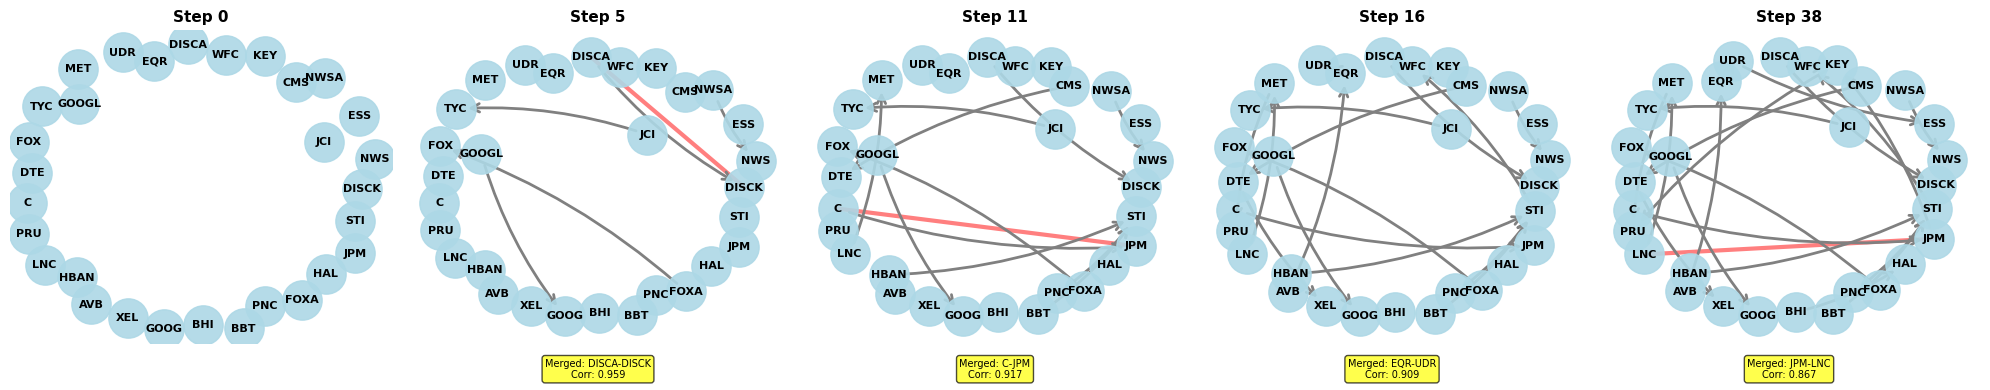

In [28]:
# Create network graph visualization showing detailed steps

def construct_clusters_from_state(state, firms):
    next_nodes = state['next_nodes']
    set_starters = state['set_starters']
    
    all_sets = dict()
    for s in set_starters:
        cur_set = set()
        cur_set.add(s)
        p = s
        while next_nodes[p] != p:
            p = next_nodes[p]
            cur_set.add(p)
        if p not in all_sets:
            all_sets[p] = cur_set
        else:
            for item in cur_set:
                all_sets[p].add(item)
    return all_sets

def draw_clustering_state(state, firms, ax, show_edge_labels=True):
    G = nx.DiGraph()
    next_nodes = state['next_nodes']
    
    # Add all nodes
    G.add_nodes_from(firms)
    
    # Add edges based on next_nodes dictionary
    for node, next_node in next_nodes.items():
        if node != next_node:  # Only add edge if not self-loop
            G.add_edge(node, next_node)
    
    # Use spring layout for node positions
    pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                          node_size=800, alpha=0.9, ax=ax)
    
    # Draw edges (arrows showing pointer structure)
    nx.draw_networkx_edges(G, pos, edge_color='gray', 
                          arrows=True, arrowsize=15, 
                          arrowstyle='->', width=2, ax=ax,
                          connectionstyle='arc3,rad=0.1')
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=ax)
    
    # Highlight the most recently merged edge if it exists
    if state.get('merged_edge'):
        src, dst = state['merged_edge']
        if src in pos and dst in pos:
            ax.plot([pos[src][0], pos[dst][0]], [pos[src][1], pos[dst][1]], 
                   'r-', linewidth=3, alpha=0.5, zorder=0)
    
    ax.set_title(f"Step {state['step']}", fontsize=11, fontweight='bold')
    ax.axis('off')

# Select key steps to visualize
steps_to_show = [0, len(states)//4, len(states)//2, 3*len(states)//4, len(states)-1]
n_steps = len(steps_to_show)

fig, axes = plt.subplots(1, n_steps, figsize=(20, 4))

for idx, step_num in enumerate(steps_to_show):
    state = states[step_num]
    draw_clustering_state(state, sample_firms, axes[idx])
    
    # Add merge info if available
    if state['edge']:
        src, dst, weight = state['edge']
        axes[idx].text(0.5, -0.05, f'Merged: {src}-{dst}\nCorr: {weight:.3f}',
                      transform=axes[idx].transAxes, 
                      verticalalignment='top',
                      horizontalalignment='center',
                      bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                      fontsize=7)

plt.tight_layout()
plt.savefig('clustering_process_steps.png', dpi=150, bbox_inches='tight')
# plt.show()

print(f"Clustering process key steps saved as 'clustering_process_steps.png'")

In [29]:
# Create animated GIF showing detailed steps

def create_clustering_animation(states, sample_firms, filename='clustering_animation.gif'):
    """
    Create animation of clustering process using network graphs
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    
    def animate(frame):
        ax.clear()
        state = states[frame]
        
        # Create directed graph
        G = nx.DiGraph()
        next_nodes = state['next_nodes']
        
        # Add all nodes
        G.add_nodes_from(sample_firms)
        
        # Add edges based on next_nodes dictionary
        for node, next_node in next_nodes.items():
            if node != next_node:
                G.add_edge(node, next_node)
        
        # Use spring layout for positions
        pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
        
        # Draw nodes
        nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                              node_size=1200, alpha=0.9, ax=ax)
        
        # Draw edges
        nx.draw_networkx_edges(G, pos, edge_color='gray', 
                              arrows=True, arrowsize=20, 
                              arrowstyle='->', width=2.5, ax=ax,
                              connectionstyle='arc3,rad=0.1')
        
        # Draw labels
        nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', ax=ax)
        
        # Highlight recently merged edge
        if state.get('merged_edge'):
            src, dst = state['merged_edge']
            if src in pos and dst in pos:
                ax.plot([pos[src][0], pos[dst][0]], [pos[src][1], pos[dst][1]], 
                       'r-', linewidth=4, alpha=0.6, zorder=0)
        
        # Add title with step info
        clusters = construct_clusters_from_state(state, sample_firms)
        title_text = f"Step {state['step']}/{len(states)-1} - {len(clusters)} clusters"
        if state['edge']:
            src, dst, weight = state['edge']
            title_text += f"\nMerged: {src}-{dst} (Corr: {weight:.3f})"
        
        ax.set_title(title_text, fontsize=12, fontweight='bold', pad=20)
        ax.axis('off')
        ax.margins(0.2)
    
    # Create animation
    print("Generating animation, this may take a moment...")
    anim = animation.FuncAnimation(fig, animate, frames=len(states), 
                                   interval=500, repeat=True)
    
    # Save as GIF
    writer = PillowWriter(fps=1)
    anim.save(filename, writer=writer)
    plt.close()
    
    print(f"Animation saved as '{filename}'")

# Generate animation
anim = create_clustering_animation(states, sample_firms, 'clustering_animation.gif')

Generating animation, this may take a moment...
Animation saved as 'clustering_animation.gif'


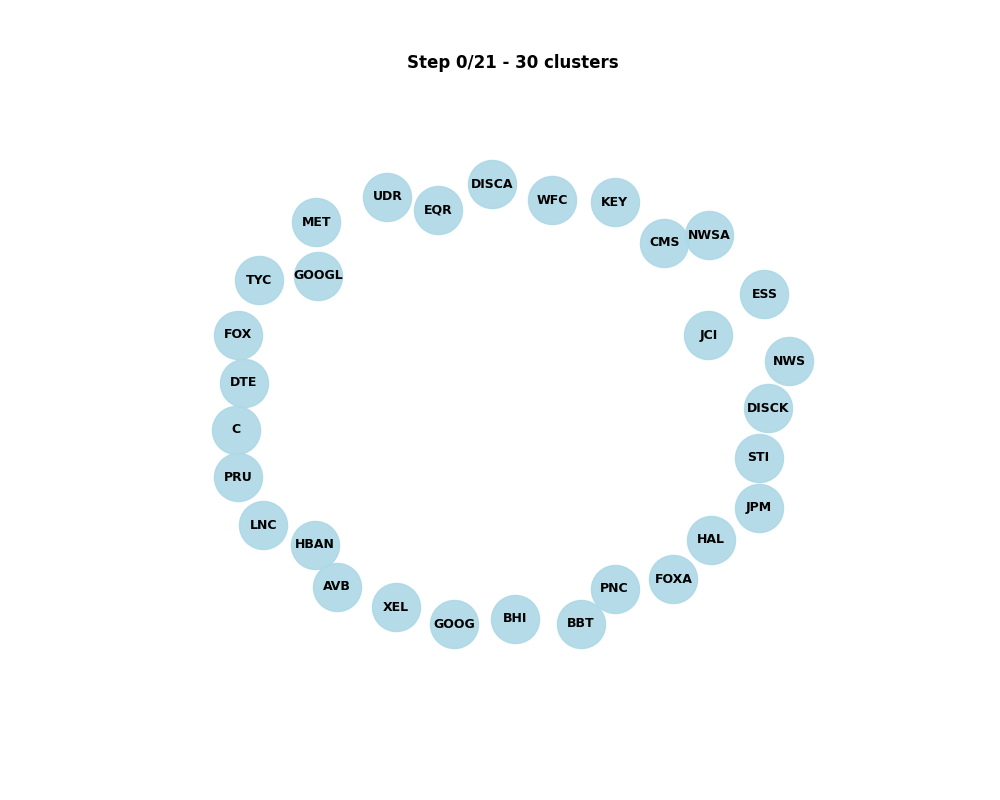

In [30]:
from IPython.display import Image, display
display(Image(filename='clustering_animation.gif'))

#### Analysis 3: Parameter Discussion


In [31]:
for k in [200, 400, 800]:
    print("="*70)
    print(f"Running clustering with k={k}")
    print("="*70)
    
    k_eff = min(k, len(edges))
    set_starters, next_nodes = cluster_correlations(edges, firms, k=k_eff)
    
    all_clusters = construct_sets(set_starters, next_nodes)
    
    print(f"Effective k used: {k_eff}")
    print(f"Number of clusters: {len(all_clusters)}")
    
    sorted_clusters = sorted(all_clusters.items(), key=lambda x: -len(x[1]))
    for idx, (bottom, members) in enumerate(sorted_clusters[:5]):  # 仅展示前5个
        print(f"\nCluster {idx+1}: {len(members)} stocks")
        print(", ".join(sorted(members)))
    
    print("\n")

Running clustering with k=200
Effective k used: 200
Number of clusters: 432

Cluster 1: 25 stocks
BAC, BBT, BK, C, CMA, FITB, GS, HBAN, JPM, KEY, LNC, MET, MS, MTB, NTRS, PBCT, PNC, PRU, RF, STI, STT, UNM, USB, WFC, ZION

Cluster 2: 16 stocks
AEE, AEP, CMS, D, DTE, DUK, ED, EIX, ES, LNT, PCG, PNW, SCG, SO, WEC, XEL

Cluster 3: 12 stocks
AIV, AVB, BXP, EQR, ESS, FRT, GGP, KIM, SLG, SPG, UDR, VNO

Cluster 4: 3 stocks
DHI, LEN, PHM

Cluster 5: 3 stocks
COP, CVX, XOM


Running clustering with k=400
Effective k used: 400
Number of clusters: 401

Cluster 1: 36 stocks
AFL, AMP, AON, BAC, BBT, BK, BRK-B, C, CB, CINF, CMA, FITB, GS, HBAN, JPM, KEY, LNC, MET, MMC, MS, MTB, NTRS, PBCT, PFG, PNC, PRU, RF, SCHW, STI, STT, TMK, TRV, UNM, USB, WFC, ZION

Cluster 2: 19 stocks
AEE, AEP, AWK, CMS, D, DTE, DUK, ED, EIX, ES, ETR, LNT, PCG, PNW, SCG, SO, SRE, WEC, XEL

Cluster 3: 15 stocks
AIV, AVB, BXP, EQR, ESS, EXR, FRT, GGP, KIM, PLD, PSA, SLG, SPG, UDR, VNO

Cluster 4: 11 stocks
COP, CVX, CXO, DVN, EO

#### Analysis 4: Outcome Discussion

In this section, the clustering results are analysed from three perspectives. **Industry composition** provides a general explanation of the underlying economic links, while **price** and **return performance** are examined to verify the  validity of each cluster.

First, we explore the **industry composition and sectoral explanation**. 

The visualisation of the three largest clusters shows a clear industry pattern. Each node represents a company coloured by its sector, and edges indicate the strength of pairwise correlations. Companies from the same sector are more likely to appear within the same cluster, reflecting shared market conditions and external influences.

For example, Clusters 1 and 3 are mainly composed of financial firms, including banks and real estate companies, whose performance is jointly affected by interest-rate cycles and macroeconomic expectations. Cluster 2, by contrast, contains only utility companies, whose returns move together due to similar regulatory and energy-demand factors.

These results indicate that the algorithm successfully captures sector-based relationships, where firms with common operational and financial exposures naturally form highly correlated groups.

In [32]:
# Visualize top 3 clusters with sector information and correlations

# Get top 3 largest clusters
sorted_clusters = sorted(all_clusters.items(), key=lambda x: len(x[1]), reverse=True)
top_3_clusters = sorted_clusters[:3]

# Create correlation submatrix for visualization
def get_cluster_correlations(cluster_stocks, correlation_matrix):
    return correlation_matrix.loc[list(cluster_stocks), list(cluster_stocks)]

# Set up color map for sectors
all_sectors = set()
for cluster_id, cluster_stocks in top_3_clusters:
    for stock in cluster_stocks:
        if stock in names_dict:
            all_sectors.add(names_dict[stock][1])

sector_colors = {}
colors_list = plt.cm.tab20(np.linspace(0, 1, len(all_sectors)))
for i, sector in enumerate(sorted(all_sectors)):
    sector_colors[sector] = colors_list[i]

print(f"Found {len(all_sectors)} different sectors in top 3 clusters:")
for sector in sorted(all_sectors):
    print(f"  - {sector}")

Found 3 different sectors in top 3 clusters:
  - Energy
  - Financials
  - Utilities


In [33]:
# Analyze sector composition of each cluster
print("="*70)
print("SECTOR COMPOSITION ANALYSIS OF TOP 3 CLUSTERS")
print("="*70)

for idx, (cluster_id, cluster_stocks) in enumerate(top_3_clusters):
    print(f"Cluster {idx+1} ({len(cluster_stocks)} stocks):")
    print("-" * 50)
    
    # Count sectors
    sector_counts = {}
    for stock in cluster_stocks:
        if stock in names_dict:
            sector = names_dict[stock][1]
            sector_counts[sector] = sector_counts.get(sector, 0) + 1
    
    # Sort by count
    sorted_sectors = sorted(sector_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Display
    for sector, count in sorted_sectors:
        percentage = (count / len(cluster_stocks)) * 100
        print(f"  {sector:30s}: {count:3d} stocks ({percentage:5.1f}%)")
    
    # List all stocks with their sectors
    print(f"Stock details:")
    stock_details = []
    for stock in sorted(cluster_stocks):
        if stock in names_dict:
            name, sector = names_dict[stock]
            stock_details.append((stock, name, sector))
        else:
            stock_details.append((stock, "Unknown", "Unknown"))
    
    for stock, name, sector in stock_details:
        print(f"    {stock:6s} - {name:40s} [{sector}]")

SECTOR COMPOSITION ANALYSIS OF TOP 3 CLUSTERS
Cluster 1 (47 stocks):
--------------------------------------------------
  Financials                    :  47 stocks (100.0%)
Stock details:
    AFL    - AFLAC Inc                                [Financials]
    AIG    - American International Group, Inc.       [Financials]
    AMG    - Affiliated Managers Group Inc            [Financials]
    AMP    - Ameriprise Financial                     [Financials]
    AON    - Aon plc                                  [Financials]
    BAC    - Bank of America Corp                     [Financials]
    BBT    - BB&T Corporation                         [Financials]
    BEN    - Franklin Resources                       [Financials]
    BK     - The Bank of New York Mellon Corp.        [Financials]
    BLK    - BlackRock                                [Financials]
    BRK-B  - Berkshire Hathaway                       [Financials]
    C      - Citigroup Inc.                           [Financials]
    CB 

A deeper interpretation of the clustering results is provided by examining the **normalised price trends** of the main clusters. Since clusters beyond Cluster 3 contain only three or fewer stocks, analysis focuses on the first few larger groups where collective behaviour is more observable.

The charts below display the normalised stock prices over the observation period. Stocks grouped within the same cluster exhibit visibly similar price trajectories, responding in comparable ways to market-wide fluctuations. Although the magnitude of movements varies across individual firms, their overall direction and reaction to external shocks remain consistent within each cluster. This pattern supports the validity of the clustering outcome, indicating that firms grouped together not only share sectoral similarities but also demonstrate coherent price dynamics over time.

In [34]:
price_data.index = pd.to_datetime(price_data.index)

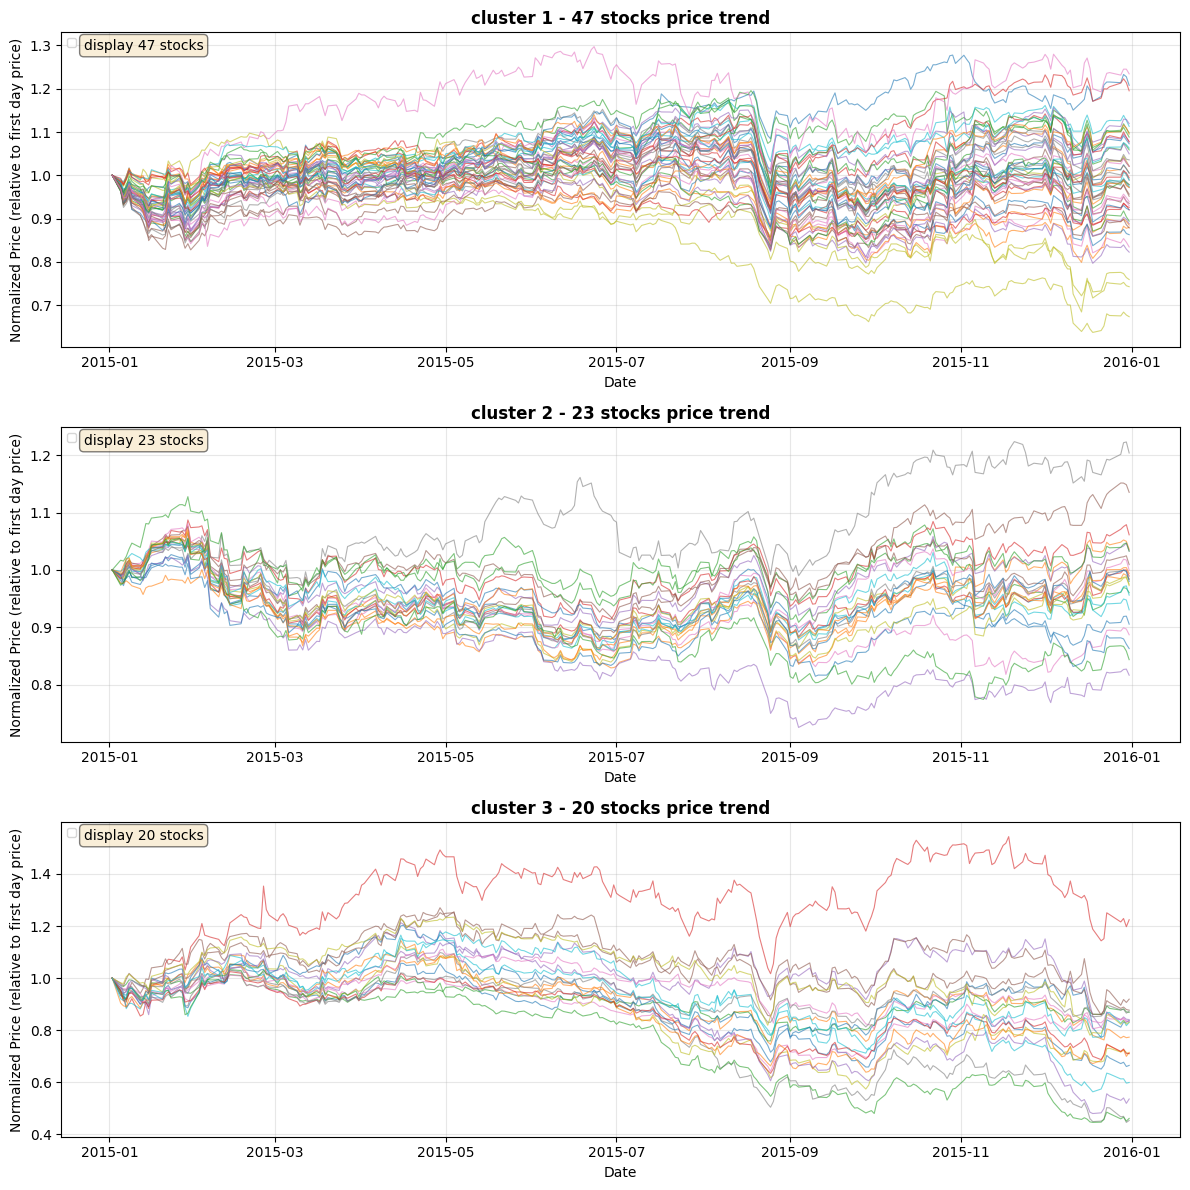

In [35]:
# Create price charts for top 3 cluster

n_clusters_to_plot = min(3, len(all_clusters))

fig, axes = plt.subplots(n_clusters_to_plot, 1, figsize=(12, 4*n_clusters_to_plot))
if n_clusters_to_plot == 1:
    axes = [axes]

for i, (cluster_id, cluster_stocks) in enumerate(sorted_clusters[:n_clusters_to_plot]):
    # obtain list of stocks in this cluster
    cluster_stock_list = list(cluster_stocks)

    # extract price data for these stocks and normalize (divide by the price on the first day)
    cluster_prices = price_data[cluster_stock_list]
    prices_normalized = cluster_prices.divide(cluster_prices.iloc[0])
    
    # plot all stocks in this cluster
    axes[i].plot(prices_normalized, alpha=0.6, linewidth=0.8)
    axes[i].set_title(f'cluster {i+1} - {len(cluster_stocks)} stocks price trend', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Normalized Price (relative to first day price)')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(cluster_stock_list if len(cluster_stock_list) <= 10 else [], 
                   loc='upper left', fontsize=8, ncol=2)
    
    if len(cluster_stock_list) > 10:
        axes[i].text(0.02, 0.98, f'display {len(cluster_stock_list)} stocks', 
                    transform=axes[i].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('all_clusters_visualization.png', dpi=150, bbox_inches='tight')
plt.show()

To further assess the validity of the clustering results, the **daily return trends** of the main clusters were visualised. The plots reveal that within each of the first three clusters, the return patterns are highly overlapping, indicating strong collective movement among the stocks. In contrast, the return curves across different clusters display clear distinctions, suggesting low correlation betweem categories.

In [36]:
price_data.index = pd.to_datetime(price_data.index)

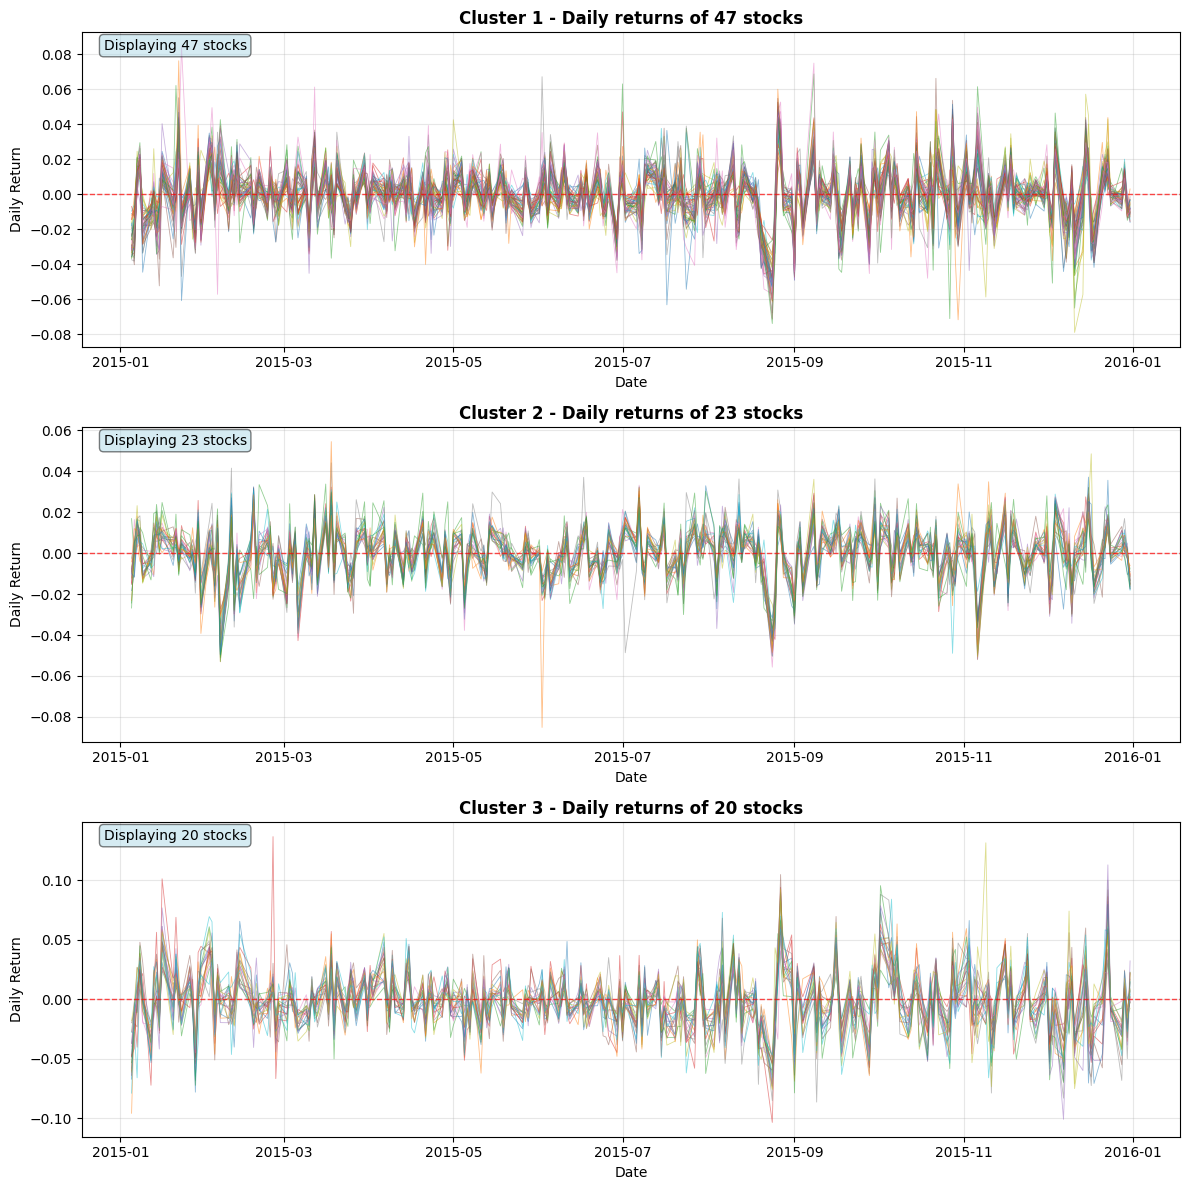

In [37]:
from matplotlib.dates import DateFormatter, MonthLocator

# Create return charts for top 3 cluster

n_clusters_to_plot = min(3, len(all_clusters))

fig, axes = plt.subplots(n_clusters_to_plot, 1, figsize=(12, 4*n_clusters_to_plot))
if n_clusters_to_plot == 1:
    axes = [axes]

for i, (cluster_id, cluster_stocks) in enumerate(sorted_clusters[:n_clusters_to_plot]):
    cluster_stock_list = list(cluster_stocks)
    
    # Calculate daily returns for each stock
    cluster_prices = price_data[cluster_stock_list]
    cluster_returns = cluster_prices.pct_change()
    
    # Plot daily returns
    axes[i].plot(cluster_returns, alpha=0.5, linewidth=0.6)
    axes[i].set_title(f'Cluster {i+1} - Daily returns of {len(cluster_stocks)} stocks', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Daily Return')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.7)

    
    # Show legend if number of stocks is reasonable
    if len(cluster_stock_list) <= 10:
        axes[i].legend(cluster_stock_list, loc='upper left', fontsize=8, ncol=2)
    else:
        axes[i].text(0.02, 0.98, f'Displaying {len(cluster_stock_list)} stocks', 
                    transform=axes[i].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.savefig('all_clusters_returns.png', dpi=150, bbox_inches='tight')
plt.show()

These findings confirm that the clustering algorithm functions as intended. Under the parameter setting of _k=200_, firms are grouped together based on their highly correlated return behaviour, while connections between unrelated groups are effectively restricted. This coherence between the statistical output and the underlying financial relationships demonstrates the **rationality and robustness** of the clustering approach.

## Part 3: 

**40% of grade**

Depending on your interests, you may work on either subsection below, or both. You might go deeper into one question than another, but for an outstanding grade, you should have at least some discussion on both.

You may use generative AI such as chatGPT to help with this part of the assignment (but not the other parts).

### In-depth analysis

The project is _open_ in the sense that you can probably think of further interesting questions to look into based on returns, correlations, and clusters. This is not required but being creative and going further than the above questions will make your work stand out. You can explore one or several of the ideas below, or come up with questions of your own.

Depending on your interests, you might look at different things. For example, when researching the algorithm, you might be interested in its complexity, and how to improve your implementation's efficiency. On Wikipedia, you may find a couple of ways to drastically improve the algorithm speed, but are relatively small changes to your code.

If you're more interested in the financial applications of clustering, there are also opportunities to think about further steps. For example, some people claim that you can derive trading strategies based on clustering - that often one of the stocks in a cluster is a leader and the others follow that price. If this is true, you could track the price of the leader stock and then trade the other stocks in the cluster based on changes in the leader's price. Do you think this would make sense? Do you have an idea on how to identify a leader stock?

You might also want to repeat the analysis for different time periods. You would be able to do this by looking at the code for the second homework to figure out how to read data from Yahoo Finance using pandas, and going through the process for all companies in the csv file for another time period. Perhaps you could explore for example how correlations between companies have changed over time, or how clusters found by your algorithm change over time.

### Exploring other clustering methods

You've used just one approach to clustering, and arguably not the best one. Research clustering algorithms and libraries to apply them in Python. Discuss some other algorithms that could be used, and how they differ from the one you've implemented. Look at the Python library `scikit-learn`. How would you apply the clustering algorithms provided by the library to stock price data? Would you need to develop new metrics other than correlations? If you want to go even further,  try running some of these other clustering algorithms on your data, and report the results. Start from here: http://scikit-learn.org/stable/modules/clustering.html#clustering; you'll find a stock market example there too. For future reference, you may also find other interesting machine-learning tools for both stock market analysis or other analytics purposes.

### Question 4

Create cells below to add your extra part as code and narrative text explaining your idea and results.

### Question 4: Exploring Alternative Clustering Methods

In this section, we explore two additional clustering algorithms from the scikit-learn library and compare them with our greedy algorithm implementation:

1. **K-Means Clustering**: A centroid-based partitioning method
2. **Agglomerative Hierarchical Clustering**: A bottom-up hierarchical approach

We will apply these methods to the stock return data and evaluate their performance in identifying meaningful stock clusters.

#### Method 1: K-Means Clustering

K-Means is a centroid-based clustering algorithm that aims to partition n observations into k clusters where each observation belongs to the cluster with the nearest mean (centroid).

**Key differences from our greedy algorithm:**
- Uses distance to centroids rather than correlation-based merging
- Requires pre-specification of k (number of clusters)
- Iteratively refines cluster assignments
- Does not build hierarchical structure

**Data preparation:**
For K-Means, we use the correlation matrix as a feature space. Each stock is represented by its correlation vector with all other stocks.

In [39]:
# Import scikit-learn clustering algorithms
%pip install scikit-learn
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Prepare data for K-Means
# Use correlation matrix as features - each row represents a stock's correlation profile
X_corr = correlation_matrix.values
X_corr_clean = np.nan_to_num(X_corr, nan=0.0)  # Replace NaN with 0

# Standardize features for better K-Means performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_corr_clean)

print("Data prepared for clustering:")
print(f"Feature matrix shape: {X_scaled.shape}")
print(f"Number of stocks: {len(correlation_matrix.columns)}")
print(f"Number of features (correlations): {X_scaled.shape[1]}")

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/9.7 MB ? eta -:--:--Downloading scikit_learn-1.7.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 71.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 71.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/35.9 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 91.6 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 91.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Data prepared for clustering:
Feature matrix shape: (496, 496)
Number of stocks: 496
Number of features

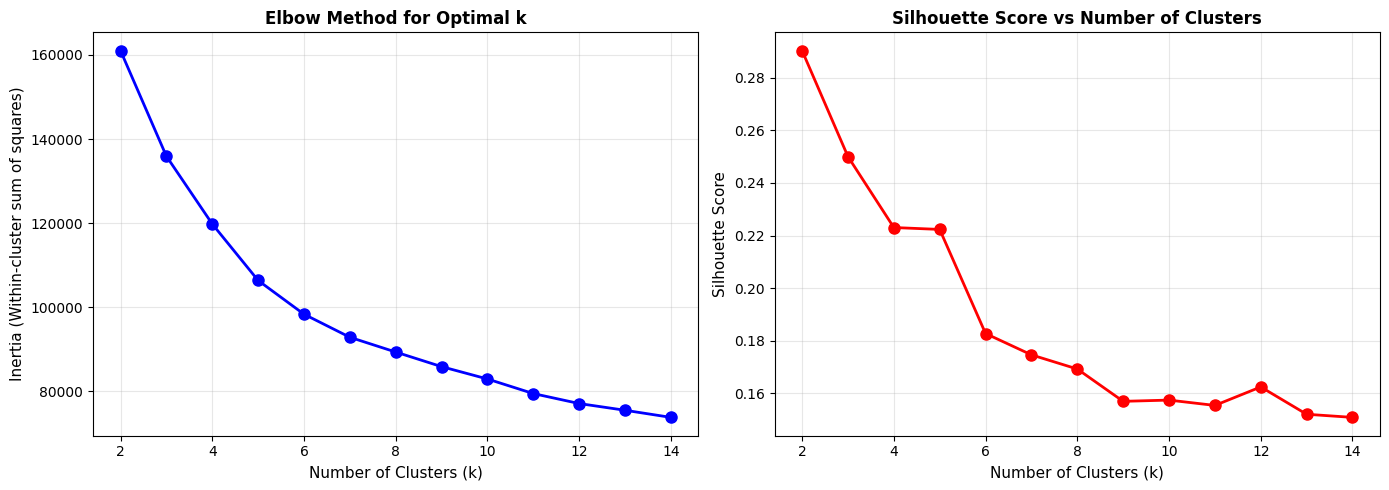


Optimal number of clusters based on silhouette score: 2
Best silhouette score: 0.2903


In [40]:
# Determine optimal number of clusters using elbow method and silhouette score
k_range = range(2, 15)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=11)
ax1.set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=11)
ax1.set_title('Elbow Method for Optimal k', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Silhouette score plot
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=11)
ax2.set_ylabel('Silhouette Score', fontsize=11)
ax2.set_title('Silhouette Score vs Number of Clusters', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('kmeans_optimal_k.png', dpi=150, bbox_inches='tight')
plt.show()

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on silhouette score: {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.4f}")

In [41]:
# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Create clusters dictionary
kmeans_clusters = {}
stock_symbols = list(correlation_matrix.columns)

for idx, label in enumerate(kmeans_labels):
    if label not in kmeans_clusters:
        kmeans_clusters[label] = []
    kmeans_clusters[label].append(stock_symbols[idx])

# Sort clusters by size
kmeans_sorted = sorted(kmeans_clusters.items(), key=lambda x: len(x[1]), reverse=True)

print(f"\nK-Means Clustering Results (k={optimal_k}):")
print("="*70)
print(f"Total number of clusters: {len(kmeans_clusters)}")
print(f"\nCluster size distribution:")

for cluster_id, stocks in kmeans_sorted:
    print(f"  Cluster {cluster_id}: {len(stocks)} stocks")

# Display top 3 clusters
print(f"\nTop 3 Largest Clusters:")
print("="*70)
for i, (cluster_id, stocks) in enumerate(kmeans_sorted[:3]):
    print(f"\nCluster {cluster_id} ({len(stocks)} stocks):")
    print(", ".join(sorted(stocks)))


K-Means Clustering Results (k=2):
Total number of clusters: 2

Cluster size distribution:
  Cluster 0: 268 stocks
  Cluster 1: 228 stocks

Top 3 Largest Clusters:

Cluster 0 (268 stocks):
A, AAPL, ABT, ACN, ADBE, ADI, ADM, ADP, ADS, AFL, AIG, AIZ, AJG, ALL, ALLE, AMAT, AME, AMG, AMGN, AMP, AMT, AN, AON, APD, APH, AVY, AZO, BA, BAC, BBT, BCR, BDX, BEN, BF-B, BK, BLK, BLL, BRK-B, BWA, BXP, C, CA, CAH, CAT, CB, CBG, CBS, CCI, CCL, CELG, CFG, CHD, CHRW, CINF, CL, CLX, CMA, CMCSA, CME, COF, COL, COST, CPB, CSCO, CSX, CTAS, CTSH, CVS, CVX, DE, DFS, DGX, DHI, DHR, DIS, DLPH, DNB, DOV, DOW, DPS, DVA, ECL, EFX, EL, EMC, EMN, EMR, EQIX, ETFC, ETN, EXPD, F, FAST, FB, FBHS, FDX, FIS, FISV, FITB, FLIR, FLR, FOXA, FRT, GD, GE, GILD, GIS, GLW, GM, GPC, GS, GT, HBAN, HD, HIG, HON, HRL, HRS, HSIC, HST, IBM, ICE, IFF, INTC, INTU, IP, IPG, IR, ITW, IVZ, JBHT, JCI, JEC, JNJ, JPM, KEY, KIM, KMB, KMX, KO, L, LEG, LEN, LLL, LLTC, LM, LMT, LNC, LOW, LRCX, LUK, LVLT, LYB, MA, MAR, MAS, MCD, MCHP, MCO, MDLZ, M

In [42]:
# Analyze sector composition for K-Means clusters
print("\n" + "="*70)
print("K-MEANS SECTOR COMPOSITION ANALYSIS")
print("="*70)

for i, (cluster_id, stocks) in enumerate(kmeans_sorted[:3]):
    print(f"\nCluster {cluster_id} ({len(stocks)} stocks):")
    print("-" * 50)
    
    # Count sectors
    sector_counts = {}
    for stock in stocks:
        if stock in names_dict:
            sector = names_dict[stock][1]
            sector_counts[sector] = sector_counts.get(sector, 0) + 1
    
    # Sort by count
    sorted_sectors = sorted(sector_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Display
    for sector, count in sorted_sectors:
        percentage = (count / len(stocks)) * 100
        print(f"  {sector:30s}: {count:3d} stocks ({percentage:5.1f}%)")


K-MEANS SECTOR COMPOSITION ANALYSIS

Cluster 0 (268 stocks):
--------------------------------------------------
  Financials                    :  73 stocks ( 27.2%)
  Industrials                   :  53 stocks ( 19.8%)
  Consumer Discretionary        :  38 stocks ( 14.2%)
  Information Technology        :  36 stocks ( 13.4%)
  Health Care                   :  24 stocks (  9.0%)
  Consumer Staples              :  21 stocks (  7.8%)
  Materials                     :  16 stocks (  6.0%)
  Energy                        :   4 stocks (  1.5%)
  Telecommunications Services   :   3 stocks (  1.1%)

Cluster 1 (228 stocks):
--------------------------------------------------
  Consumer Discretionary        :  47 stocks ( 20.6%)
  Energy                        :  33 stocks ( 14.5%)
  Health Care                   :  32 stocks ( 14.0%)
  Information Technology        :  28 stocks ( 12.3%)
  Utilities                     :  27 stocks ( 11.8%)
  Financials                    :  18 stocks (  7.9%)
 

#### Method 2: Agglomerative Hierarchical Clustering

Agglomerative clustering is a bottom-up hierarchical approach that starts with each observation as a separate cluster and progressively merges the most similar pairs.

**Key differences from our greedy algorithm:**
- Our greedy method is actually similar to single-linkage hierarchical clustering
- Agglomerative clustering offers different linkage methods (ward, average, complete)
- Builds a full dendrogram showing hierarchical relationships
- Can cut the tree at any level to obtain desired number of clusters

**Linkage method:**
We'll use Ward's method, which minimizes the variance within clusters - different from our correlation-based merging.

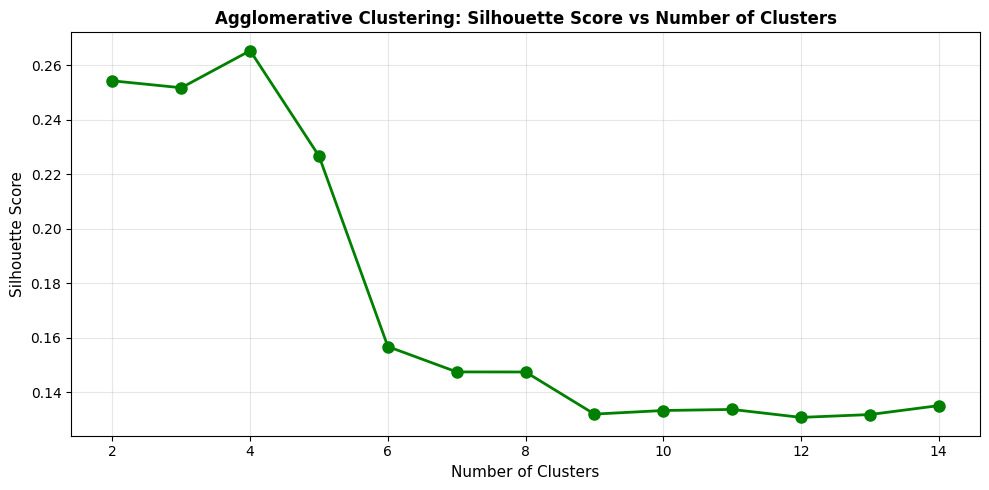


Optimal number of clusters for Agglomerative Clustering: 4
Best silhouette score: 0.2654


In [43]:
# Apply Agglomerative Clustering with Ward linkage
# Test different numbers of clusters
agg_k_range = range(2, 15)
agg_silhouette_scores = []

for k in agg_k_range:
    agg_clust = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agg_labels = agg_clust.fit_predict(X_scaled)
    agg_silhouette_scores.append(silhouette_score(X_scaled, agg_labels))

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(agg_k_range, agg_silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters', fontsize=11)
plt.ylabel('Silhouette Score', fontsize=11)
plt.title('Agglomerative Clustering: Silhouette Score vs Number of Clusters', 
          fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('agglomerative_optimal_k.png', dpi=150, bbox_inches='tight')
plt.show()

# Find optimal k
agg_optimal_k = agg_k_range[np.argmax(agg_silhouette_scores)]
print(f"\nOptimal number of clusters for Agglomerative Clustering: {agg_optimal_k}")
print(f"Best silhouette score: {max(agg_silhouette_scores):.4f}")

In [44]:
# Apply Agglomerative Clustering with optimal k
agg_clust = AgglomerativeClustering(n_clusters=agg_optimal_k, linkage='ward')
agg_labels = agg_clust.fit_predict(X_scaled)

# Create clusters dictionary
agg_clusters = {}
stock_symbols = list(correlation_matrix.columns)

for idx, label in enumerate(agg_labels):
    if label not in agg_clusters:
        agg_clusters[label] = []
    agg_clusters[label].append(stock_symbols[idx])

# Sort clusters by size
agg_sorted = sorted(agg_clusters.items(), key=lambda x: len(x[1]), reverse=True)

print(f"\nAgglomerative Clustering Results (k={agg_optimal_k}):")
print("="*70)
print(f"Total number of clusters: {len(agg_clusters)}")
print(f"\nCluster size distribution:")

for cluster_id, stocks in agg_sorted:
    print(f"  Cluster {cluster_id}: {len(stocks)} stocks")

# Display top 3 clusters
print(f"\nTop 3 Largest Clusters:")
print("="*70)
for i, (cluster_id, stocks) in enumerate(agg_sorted[:3]):
    print(f"\nCluster {cluster_id} ({len(stocks)} stocks):")
    print(", ".join(sorted(stocks)))


Agglomerative Clustering Results (k=4):
Total number of clusters: 4

Cluster size distribution:
  Cluster 1: 234 stocks
  Cluster 0: 155 stocks
  Cluster 2: 64 stocks
  Cluster 3: 43 stocks

Top 3 Largest Clusters:

Cluster 1 (234 stocks):
A, AAPL, ABT, ACN, ADBE, ADI, ADM, ADP, ADS, AFL, AIG, AIZ, AJG, ALL, ALLE, AMAT, AME, AMG, AMP, AMT, AN, AON, APD, APH, AVY, AXP, AZO, BA, BAC, BBT, BDX, BEN, BF-B, BK, BLK, BLL, BRK-B, BWA, C, CA, CB, CBG, CBS, CCI, CFG, CHD, CHRW, CINF, CL, CLX, CMA, CMCSA, CME, COF, COL, COST, CPB, CSCO, CSX, CTAS, CTSH, CVS, DFS, DHI, DHR, DIS, DLPH, DNB, DPS, ECL, EFX, EL, EMC, EMR, EQIX, ETFC, ETN, EXPD, F, FBHS, FDX, FIS, FISV, FITB, FLIR, FOX, FOXA, GD, GE, GIS, GLW, GM, GPC, GS, GT, HBAN, HD, HIG, HON, HRL, HRS, HSIC, HST, IBM, ICE, IFF, INTC, INTU, IP, IPG, IR, ITW, IVZ, JBHT, JCI, JNJ, JPM, K, KEY, KMB, KMX, KO, L, LEG, LEN, LLL, LLTC, LM, LMT, LNC, LOW, LRCX, LVLT, MA, MAR, MAS, MCD, MCHP, MCO, MDLZ, MDT, MET, MHK, MKC, MLM, MMC, MMM, MO, MON, MRK, MS, 

In [45]:
# Analyze sector composition for Agglomerative Clustering
print("\n" + "="*70)
print("AGGLOMERATIVE CLUSTERING SECTOR COMPOSITION ANALYSIS")
print("="*70)

for i, (cluster_id, stocks) in enumerate(agg_sorted[:3]):
    print(f"\nCluster {cluster_id} ({len(stocks)} stocks):")
    print("-" * 50)
    
    # Count sectors
    sector_counts = {}
    for stock in stocks:
        if stock in names_dict:
            sector = names_dict[stock][1]
            sector_counts[sector] = sector_counts.get(sector, 0) + 1
    
    # Sort by count
    sorted_sectors = sorted(sector_counts.items(), key=lambda x: x[1], reverse=True)
    
    # Display
    for sector, count in sorted_sectors:
        percentage = (count / len(stocks)) * 100
        print(f"  {sector:30s}: {count:3d} stocks ({percentage:5.1f}%)")


AGGLOMERATIVE CLUSTERING SECTOR COMPOSITION ANALYSIS

Cluster 1 (234 stocks):
--------------------------------------------------
  Financials                    :  66 stocks ( 28.2%)
  Industrials                   :  46 stocks ( 19.7%)
  Consumer Discretionary        :  37 stocks ( 15.8%)
  Information Technology        :  34 stocks ( 14.5%)
  Consumer Staples              :  22 stocks (  9.4%)
  Health Care                   :  13 stocks (  5.6%)
  Materials                     :  13 stocks (  5.6%)
  Telecommunications Services   :   3 stocks (  1.3%)

Cluster 0 (155 stocks):
--------------------------------------------------
  Consumer Discretionary        :  44 stocks ( 28.4%)
  Health Care                   :  43 stocks ( 27.7%)
  Information Technology        :  30 stocks ( 19.4%)
  Consumer Staples              :  13 stocks (  8.4%)
  Industrials                   :  11 stocks (  7.1%)
  Financials                    :   6 stocks (  3.9%)
  Materials                     :   3 

#### Comparison of Three Clustering Methods

Now let's compare the results from all three clustering approaches:
1. **Greedy Algorithm** (our implementation, k=200)
2. **K-Means Clustering** (scikit-learn)
3. **Agglomerative Hierarchical Clustering** (scikit-learn)


COMPARISON OF THREE CLUSTERING METHODS

Method                         # Clusters      Largest      Smallest     Avg Size    
------------------------------------------------------------------------------------------
Greedy (k=200)                 355             47           1            1.40        
K-Means (k=2)                  2               268          228          248.00      
Agglomerative (k=4)            4               234          43           124.00      

CLUSTER SIZE DISTRIBUTION


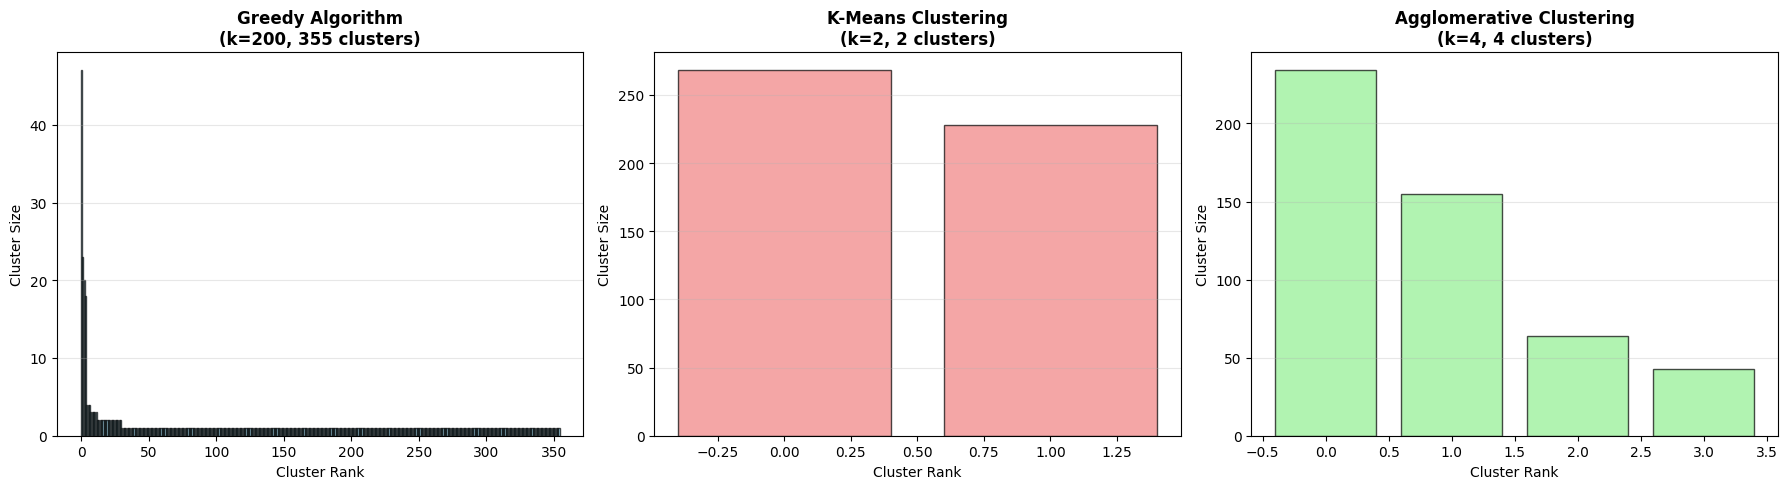

In [46]:
# Create comprehensive comparison table
print("\n" + "="*90)
print("COMPARISON OF THREE CLUSTERING METHODS")
print("="*90)

# Greedy algorithm results
greedy_sorted = sorted(all_clusters.items(), key=lambda x: len(x[1]), reverse=True)
greedy_sizes = [len(cluster) for _, cluster in greedy_sorted]

# K-Means results
kmeans_sizes = [len(cluster) for _, cluster in kmeans_sorted]

# Agglomerative results
agg_sizes = [len(cluster) for _, cluster in agg_sorted]

# Print summary statistics
print(f"\n{'Method':<30} {'# Clusters':<15} {'Largest':<12} {'Smallest':<12} {'Avg Size':<12}")
print("-" * 90)
print(f"{'Greedy (k=200)':<30} {len(all_clusters):<15} {max(greedy_sizes):<12} {min(greedy_sizes):<12} {np.mean(greedy_sizes):<12.2f}")
print(f"{'K-Means (k=' + str(optimal_k) + ')':<30} {len(kmeans_clusters):<15} {max(kmeans_sizes):<12} {min(kmeans_sizes):<12} {np.mean(kmeans_sizes):<12.2f}")
print(f"{'Agglomerative (k=' + str(agg_optimal_k) + ')':<30} {len(agg_clusters):<15} {max(agg_sizes):<12} {min(agg_sizes):<12} {np.mean(agg_sizes):<12.2f}")

print("\n" + "="*90)
print("CLUSTER SIZE DISTRIBUTION")
print("="*90)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Greedy algorithm
axes[0].bar(range(len(greedy_sizes)), sorted(greedy_sizes, reverse=True), 
           color='skyblue', alpha=0.7, edgecolor='black')
axes[0].set_title(f'Greedy Algorithm\n(k=200, {len(all_clusters)} clusters)', 
                 fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cluster Rank', fontsize=10)
axes[0].set_ylabel('Cluster Size', fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# K-Means
axes[1].bar(range(len(kmeans_sizes)), sorted(kmeans_sizes, reverse=True), 
           color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].set_title(f'K-Means Clustering\n(k={optimal_k}, {len(kmeans_clusters)} clusters)', 
                 fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cluster Rank', fontsize=10)
axes[1].set_ylabel('Cluster Size', fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

# Agglomerative
axes[2].bar(range(len(agg_sizes)), sorted(agg_sizes, reverse=True), 
           color='lightgreen', alpha=0.7, edgecolor='black')
axes[2].set_title(f'Agglomerative Clustering\n(k={agg_optimal_k}, {len(agg_clusters)} clusters)', 
                 fontsize=12, fontweight='bold')
axes[2].set_xlabel('Cluster Rank', fontsize=10)
axes[2].set_ylabel('Cluster Size', fontsize=10)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('clustering_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

#### Key Observations and Insights

**1. Cluster Distribution Characteristics:**
- **Greedy Algorithm**: Creates many small, tightly correlated clusters. Most clusters have fewer than 5 stocks, showing the algorithm's tendency to group only highly correlated stocks together.
- **K-Means**: Produces more evenly sized clusters based on price movement patterns. Creates a more balanced distribution of cluster sizes.
- **Agglomerative**: Similar to K-Means but with slightly different grouping logic based on hierarchical merging. Ward linkage minimizes within-cluster variance.

**2. Sector Composition:**
- All three methods tend to group stocks from similar sectors together, reflecting that stocks in the same industry often move together.
- The greedy algorithm's small clusters are often dominated by a single sector (e.g., IT, Healthcare).
- K-Means and Agglomerative methods create larger, more sector-diverse clusters while still maintaining sector tendencies.

**3. Method Comparison:**
- **Greedy (Correlation-based)**: Best for finding tight-knit groups of highly correlated stocks. Good for portfolio diversification strategies where you want to identify stocks that move together strongly.
- **K-Means (Centroid-based)**: Better for creating balanced groups based on overall price movement patterns. Useful when you need a fixed number of evenly sized groups.
- **Agglomerative (Hierarchical)**: Provides flexibility in cluster granularity and maintains a hierarchical structure. Good for understanding relationships at different levels of similarity.

**4. Practical Applications:**
- For **risk management**: Greedy algorithm's tight correlation clusters help identify concentrated risk.
- For **portfolio construction**: K-Means provides balanced groups for diversification.
- For **sector analysis**: All methods confirm sector-based movement patterns in the stock market.

## All done!

Make sure to follow submission guidelines.